In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel(r"C:\Users\Prerana\Desktop\Data Science\New Trainer learnings\ML\Decision Tree\Decision Tree Classifier\playing_data.xlsx")

In [5]:
df.head()

,Outlook,Temperature,Humidity,Wind,Decision,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Sunny,Hot,High,Weak,No,NaN,NaN,NaN,Yes,No,Total,NaN,NaN,NaN,NaN
1,Sunny,Hot,High,Strong,No,NaN,NaN,NaN,9,5,14,NaN,NaN,NaN,NaN
2,Overcast,Hot,High,Weak,Yes,NaN,NaN,Prob,0.642857,0.357143,NaN,NaN,NaN,NaN,NaN
3,Rain,Mild,High,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rain,Cool,Normal,Weak,Yes,NaN,Overall Entropy,NaN,0.940286,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],axis=1,inplace=True)

In [10]:
df

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [11]:
df = df.iloc[:14,:]

In [12]:
df

,Outlook,Temperature,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [13]:
def calculate_entropy(pos_opt,neg_opt):
    total = pos_opt + neg_opt
    return -(pos_opt/total)*np.log2(pos_opt/total) - (neg_opt/total)*np.log2(neg_opt/total)

In [14]:
overall_entropy = calculate_entropy(9,5)
overall_entropy

0.9402859586706311

In [16]:
sunny_entropy = calculate_entropy(2,3)
sunny_entropy

0.9709505944546686

In [17]:
overcast_entropy = calculate_entropy(4,0)
overcast_entropy

nan

In [18]:
rain_entropy = calculate_entropy(3,2)
rain_entropy

0.9709505944546686

In [19]:
weighted_entropy_outlook = ((5/14)*sunny_entropy) + ((4/14)*0) + ((5/14)*rain_entropy)
weighted_entropy_outlook

0.6935361388961918

In [20]:
ig_outlook = overall_entropy - weighted_entropy_outlook
ig_outlook

0.24674981977443933

IG Outlook = 0.24

In [23]:
hot_entropy = calculate_entropy(2,2)
hot_entropy

1.0

In [24]:
mild_entropy = calculate_entropy(4,2)
mild_entropy

0.9182958340544896

In [26]:
cool_entropy = calculate_entropy(3,1)
cool_entropy

0.8112781244591328

In [27]:
weighted_entropy_temperature = ((4/14)*hot_entropy) + ((6/14)*mild_entropy) + ((4/14)*cool_entropy)
weighted_entropy_temperature

0.9110633930116763

In [28]:
ig_temperature = overall_entropy - weighted_entropy_temperature
ig_temperature

0.02922256565895487

IG Temperature = 0.029

In [29]:
high_entropy = calculate_entropy(3,4)
high_entropy

0.9852281360342515

In [30]:
normal_entropy = calculate_entropy(6,1)
normal_entropy

0.5916727785823275

In [31]:
weighted_entropy_humidity = ((7/14)*high_entropy) + ((7/14)*normal_entropy)
weighted_entropy_humidity

0.7884504573082896

In [32]:
ig_humidity = overall_entropy - weighted_entropy_humidity
ig_humidity

0.15183550136234159

IG Humidity = 0.15

In [33]:
weak_entropy = calculate_entropy(6,2)
weak_entropy

0.8112781244591328

In [34]:
strong_entropy = calculate_entropy(3,3)
strong_entropy

1.0

In [35]:
weighted_entropy_wind = ((8/14)*weak_entropy) + ((6/14)*strong_entropy)
weighted_entropy_wind

0.8921589282623617

In [37]:
ig_wind = overall_entropy - weighted_entropy_wind
ig_wind

0.04812703040826949

IG Wind = 0.04

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dtc = DecisionTreeClassifier()

In [6]:
x = iris.data
y = iris.target

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_tr,x_te,y_tr,y_te = train_test_split(iris.data,iris.target,test_size=0.2,random_state=30)

In [18]:
dtc.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [19]:
y_pred = dtc.predict(x_te)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_te,y_pred)

0.9666666666666667

In [23]:
from sklearn import tree

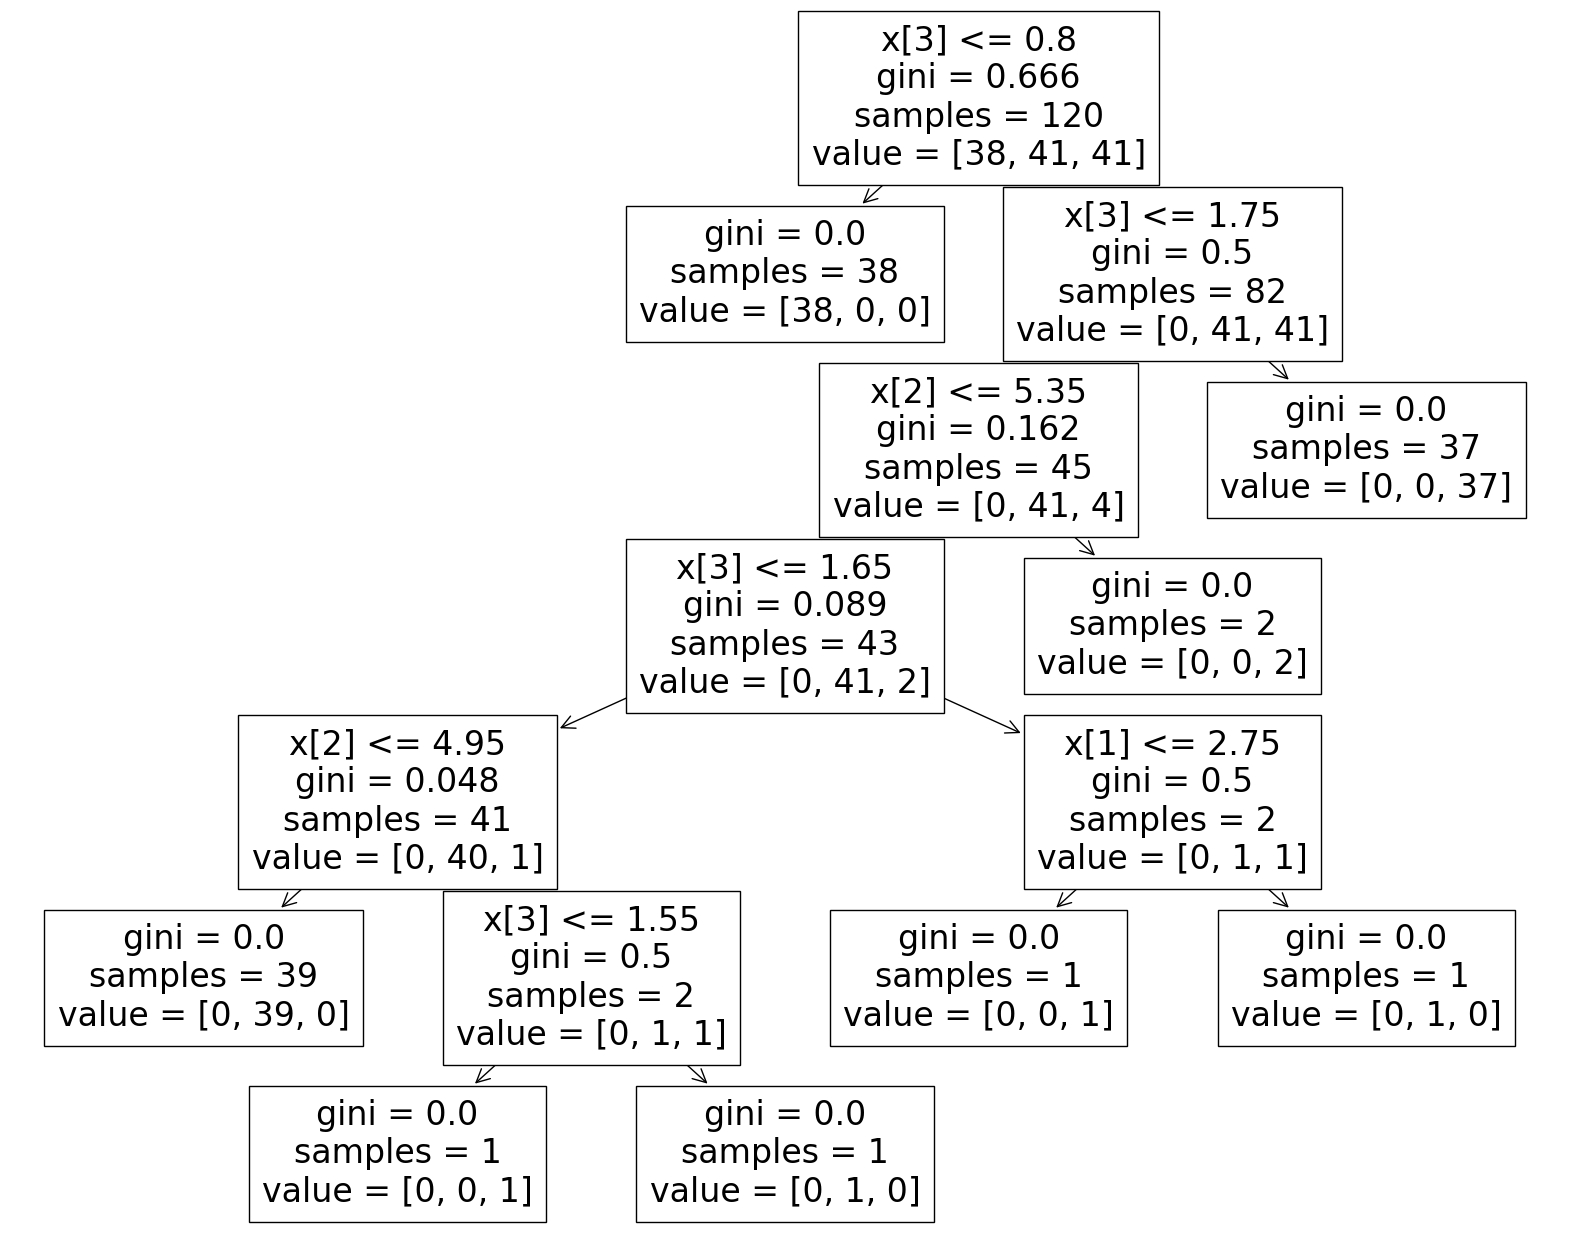

In [24]:
plt.figure(figsize=(20,16))
tree.plot_tree(dtc)
plt.show()

In [25]:
dtc2 = DecisionTreeClassifier(max_depth=2)

In [26]:
dtc2.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=2)

In [28]:
y_p = dtc2.predict(x_te)

In [29]:
accuracy_score(y_te,y_p)

0.9333333333333333

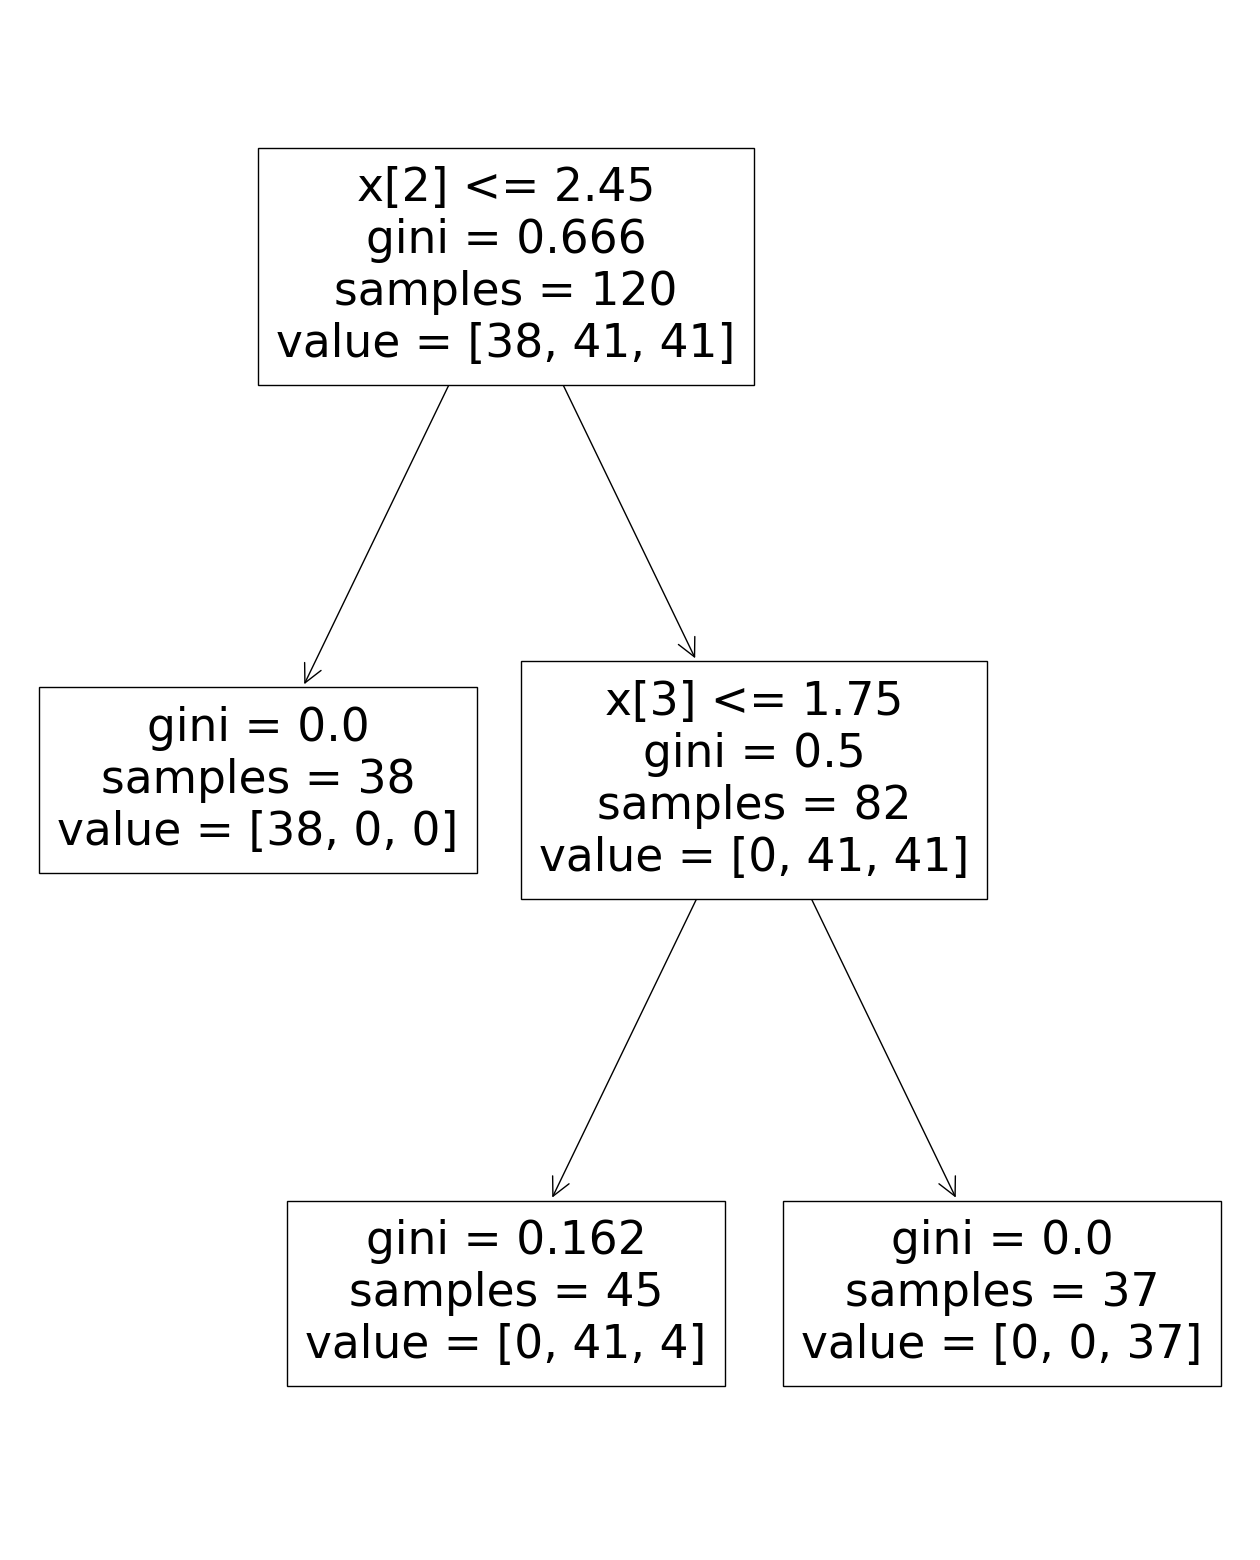

In [31]:
plt.figure(figsize=(16,20))
tree.plot_tree(dtc2)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [47]:
estim = DecisionTreeClassifier()

In [59]:
param = {'criterion':['entropy','gini'],
        'max_depth':[1,2,3,4,5,6,7,8,9],
        'max_features':[1,2,3,4]}

In [60]:
gsc = GridSearchCV(estimator=estim,param_grid=param,n_jobs=-1,cv=10,verbose=True)

In [61]:
gsc.fit(x_tr,y_tr)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4]},
             verbose=True)

In [62]:
gsc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 3}

In [63]:
gsc.best_score_

0.975

In [68]:
dtc3 = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=4)

In [69]:
dtc3.fit(x_tr,y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=4)

In [70]:
y_pred2 = dtc.predict(x_te)

In [71]:
accuracy_score(y_te,y_pred2)

0.9666666666666667

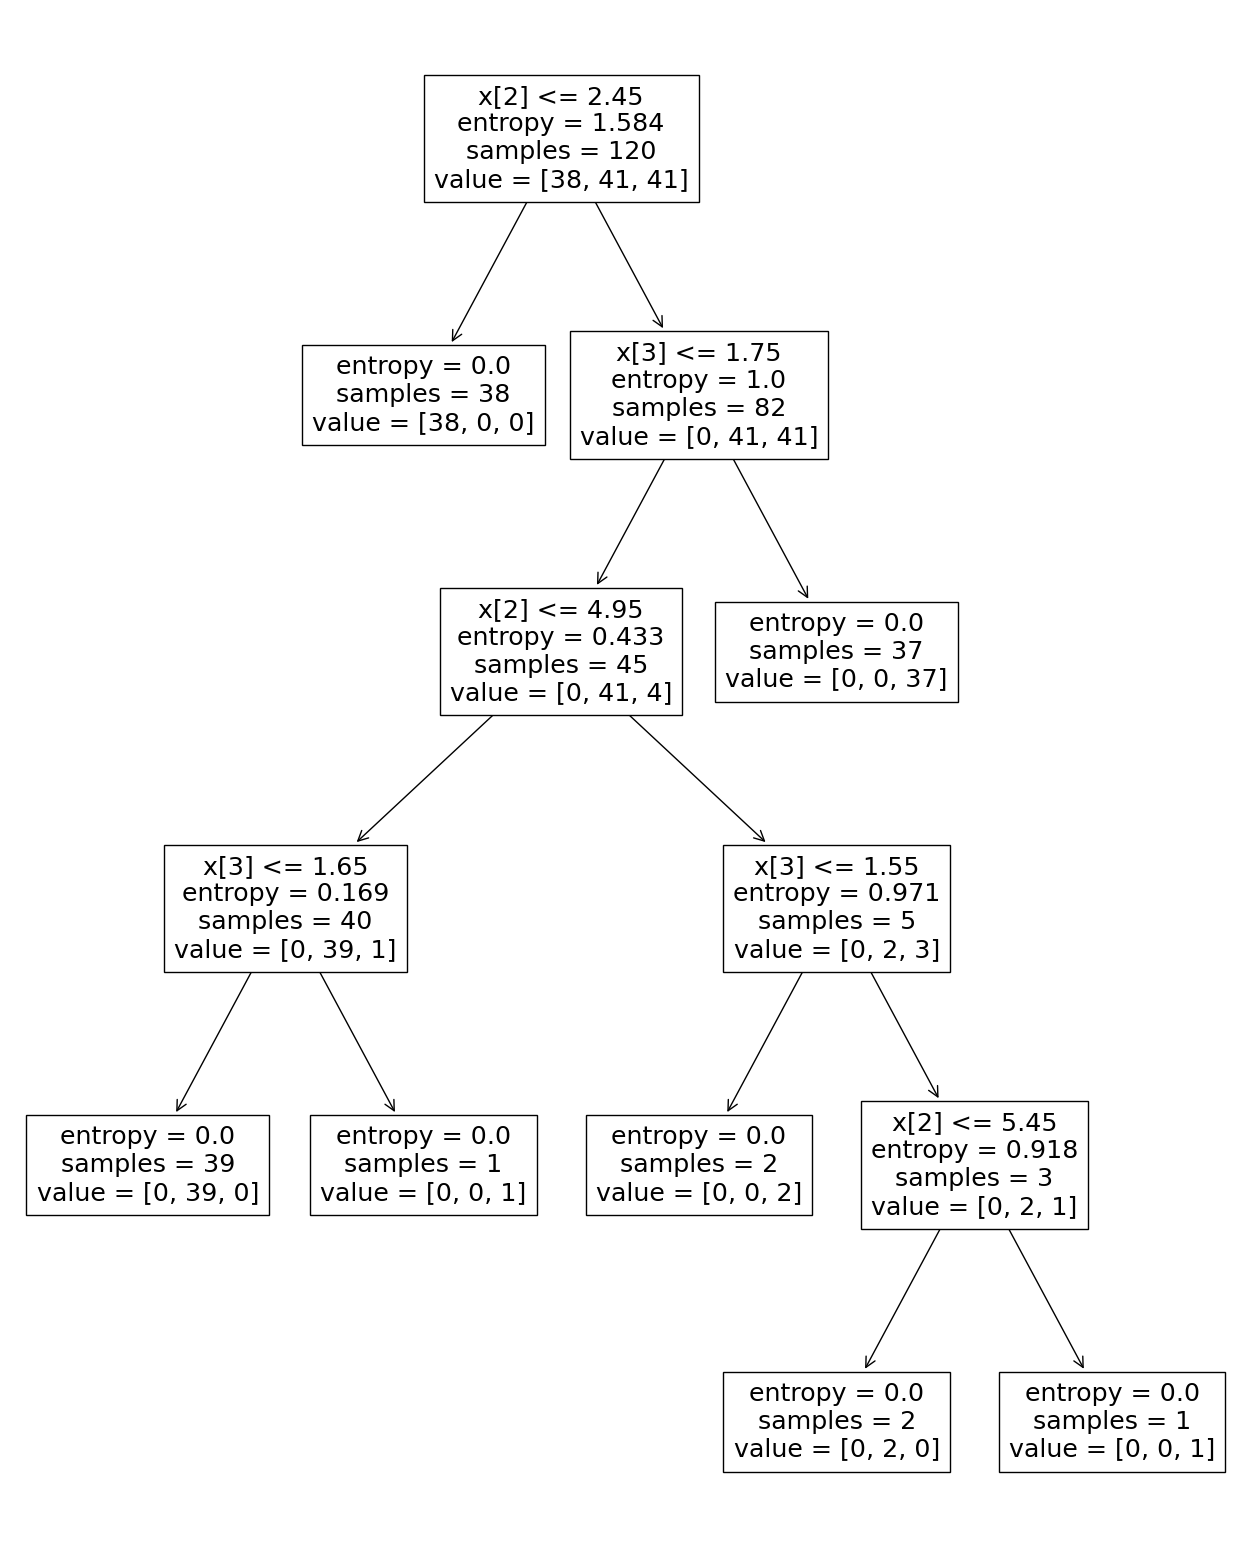

In [72]:
plt.figure(figsize=(16,20))
tree.plot_tree(dtc3)
plt.show()